# 다층 퍼셉트론과 딥러닝

김보람  
2023-04-24

# ref

-   [파이썬 데이터 분석](http://www.yes24.com/Product/Goods/108023856)

# XOR연산

## 1. 패키지 설정

In [1]:
from sklearn.neural_network import MLPClassifier
import numpy as np

## 2. 데이터 작성

In [2]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,1,1,0])

-   입력 값, 목표 값 작성

## 3. 모형화

In [4]:
model=MLPClassifier(hidden_layer_sizes=(2),
                    activation='logistic',
                    solver='lbfgs',
                    max_iter=100)

## 4. 학습

In [5]:
model.fit(X,y)

## 5. 예측

In [6]:
print(model.predict(X))

[0 0 1 0]

# 비선형 함수의 회귀분석

## 1. 패키지 설정

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

## 2. 데이터 준비

In [8]:
X=np.array(range(1,101))
print(X)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]

In [9]:
y=0.5*(X-50)**3 - 50000/X + 120000
print(y)

[ 11175.5         39704.          51421.83333333  58832.
  64437.5         69074.66666667  73103.64285714  76706.
  79983.94444444  83000.          85795.04545455  88397.33333333
  90827.34615385  93100.57142857  95229.16666667  97223.
  99090.32352941 100838.22222222 102472.92105263 104000.
 105424.54761905 106751.27272727 107984.58695652 109128.66666667
 110187.5        111164.92307692 112064.64814815 112890.28571429
 113645.36206897 114333.33333333 114957.59677419 115521.5
 116028.34848485 116481.41176471 116883.92857143 117239.11111111
 117550.14864865 117820.21052632 118052.44871795 118250.
 118415.98780488 118553.52380952 118665.70930233 118755.63636364
 118826.38888889 118881.04347826 118922.67021277 118954.33333333
 118979.09183673 119000.         119020.10784314 119042.46153846
 119070.10377358 119106.07407407 119153.40909091 119215.14285714
 119294.30701754 119393.93103448 119517.04237288 119666.66666667
 119845.82786885 120057.5483871  120304.84920635 120590.75
 120918.26923

## 3. 탐색적 데이터 분석

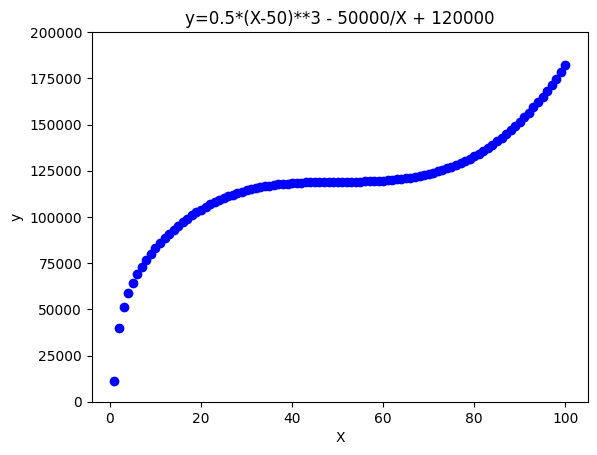

In [10]:
plt.scatter(X, y, color='b')
plt.title('y=0.5*(X-50)**3 - 50000/X + 120000')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim(0,200000)
plt.show()

## 4. 데이터 분리

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=1234)

In [12]:
print(X_train)
print(X_test)

[  5  65  11  94  58  73  37   8  55  78  22  19  71  87  23   7  45   9
  42  17  46  21  26  56  79  32  93   6  85  33  53  14  92  18  29  47
  61  15  66  13  20   3   4   1  12  68  98  35  38  96  51 100  74  81
  70  59  91  90  44  31  27  24  50  16  25  77  54  39  84  48]
[41 36 82 62 99 69 86 28 40 43 34 60 64 95 57 88 97  2 72 83 10 52 30 89
 76 75 63 67 80 49]

In [13]:
print(y_train)
print(y_test)

[ 64437.5        120918.26923077  85795.04545455 162060.08510638
 119393.93103448 125398.56849315 117550.14864865  76706.
 119153.40909091 130334.97435897 106751.27272727 102472.92105263
 123926.27464789 144751.78735632 107984.58695652  73103.64285714
 118826.38888889  79983.94444444 118553.52380952  99090.32352941
 118881.04347826 105424.54761905 111164.92307692 119215.14285714
 131561.58860759 115521.5        159215.8655914   69074.66666667
 140849.26470588 116028.34848485 119070.10377358  93100.57142857
 156500.52173913 100838.22222222 113645.36206897 118922.67021277
 119845.82786885  95229.16666667 121290.42424242  90827.34615385
 104000.          51421.83333333  58832.          11175.5
  88397.33333333 122180.70588235 174785.79591837 116883.92857143
 117820.21052632 168147.16666667 119020.10784314 182000.
 126236.32432432 134278.21604938 123285.71428571 119517.04237288
 153911.04945055 151444.44444444 118755.63636364 114957.59677419
 112064.64814815 109128.66666667 119000.        

## 5. 피처 스케일링

In [15]:
X_train = X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
print(X_train)

[[  5]
 [ 65]
 [ 11]
 [ 94]
 [ 58]
 [ 73]
 [ 37]
 [  8]
 [ 55]
 [ 78]
 [ 22]
 [ 19]
 [ 71]
 [ 87]
 [ 23]
 [  7]
 [ 45]
 [  9]
 [ 42]
 [ 17]
 [ 46]
 [ 21]
 [ 26]
 [ 56]
 [ 79]
 [ 32]
 [ 93]
 [  6]
 [ 85]
 [ 33]
 [ 53]
 [ 14]
 [ 92]
 [ 18]
 [ 29]
 [ 47]
 [ 61]
 [ 15]
 [ 66]
 [ 13]
 [ 20]
 [  3]
 [  4]
 [  1]
 [ 12]
 [ 68]
 [ 98]
 [ 35]
 [ 38]
 [ 96]
 [ 51]
 [100]
 [ 74]
 [ 81]
 [ 70]
 [ 59]
 [ 91]
 [ 90]
 [ 44]
 [ 31]
 [ 27]
 [ 24]
 [ 50]
 [ 16]
 [ 25]
 [ 77]
 [ 54]
 [ 39]
 [ 84]
 [ 48]]

In [16]:
scalerX=MinMaxScaler()
scalerX.fit(X_train)
X_train_norm=scalerX.transform(X_train)

In [17]:
scalerY=MinMaxScaler()
scalerY.fit(y_train)
y_train_norm=scalerY.transform(y_train)

In [18]:
X_test_norm=scalerX.transform(X_test)
y_test_norm=scalerY.transform(y_test)

## 6. 모형화 및 학습

In [20]:
model=MLPRegressor(hidden_layer_sizes=(4),
                   activation='logistic',
                   solver='lbfgs',
                   max_iter=500)

In [21]:
model.fit(X_train_norm,y_train_norm)

/home/coco/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

## 7. 예측

In [22]:
y_pred=model.predict(X_test_norm)
print(y_pred)

[0.58532633 0.5596793  0.78666172 0.69076416 0.86381245 0.72489815
 0.80520178 0.51832425 0.58021083 0.59553508 0.5493746  0.68090896
 0.70057482 0.84605491 0.66604552 0.81438502 0.85496516 0.38241064
 0.73934651 0.79131812 0.42434114 0.64106953 0.52869543 0.81895453
 0.75843272 0.7536807  0.69567514 0.71520447 0.77730687 0.62596952]

In [25]:
# 데이터 구조의 변형
y_pred=y_pred.reshape(-1,1)

In [26]:
# 예측 값의 역변환
y_pred_inverse=scalerY.inverse_transform(y_pred)
print(y_pred_inverse)

[[111163.57767477]
 [106782.43697013]
 [145556.59434008]
 [129174.94277171]
 [158735.82920511]
 [135005.86461054]
 [148723.69087489]
 [ 99717.9814556 ]
 [110289.72571243]
 [112907.48205149]
 [105022.14122011]
 [127491.43180009]
 [130850.84418785]
 [155702.4069167 ]
 [124952.39323735]
 [150292.41387152]
 [157224.4958677 ]
 [ 76500.60587199]
 [137473.99775244]
 [146352.02276425]
 [ 83663.3625764 ]
 [120685.88219775]
 [101489.63200544]
 [151072.99795266]
 [140734.38957096]
 [139922.62822513]
 [130013.85862295]
 [133349.94535149]
 [143958.55773291]
 [118106.43080755]]

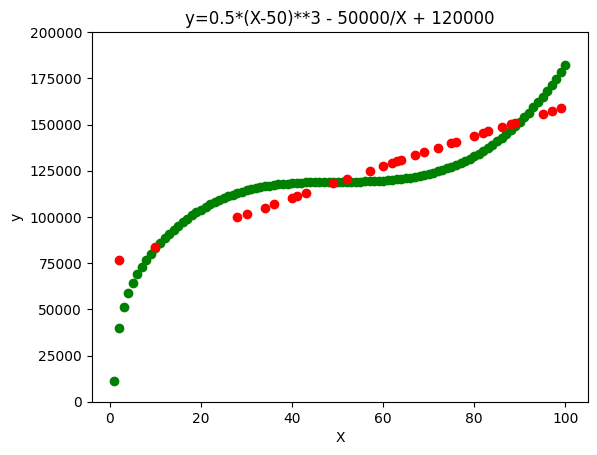

In [27]:
plt.scatter(X,y, color='g')
# 원데이터
plt.title('y=0.5*(X-50)**3 - 50000/X + 120000')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim(0,200000)

# 테스트데이터
plt.scatter(X_test, y_pred_inverse, color='r')
plt.show()

In [28]:
print('MAPE:%.2f' % 
      mean_absolute_percentage_error(y_test,y_pred_inverse))

MAPE:0.10